In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Intro to NetworkX
# Adding and Editing graph nodes

'''use g = nx.Graph() to create a graph'''

g = nx.Graph()

'''Lesson: use .add_node(1) to add a single node'''

# TODO: add a node
g.add_node(1)

'''Lesson: use .add_nodes_from([2, 3, 'four', 5])  to add in bulk'''

# TODO: add multiple nodes
g.add_nodes_from([2, 3, 'four', 5])

g.nodes()  # run g.nodes() to view the graph

[1, 2, 3, 'four', 5]

In [4]:
'''Note that NetworkX won't complain if we re-add pre-existing nodes'''

# TODO: try re-adding nodes to see what happens
g.add_node('Tim')

g.nodes()  # display nodes

[1, 2, 3, 5, 'four', 'Tim']

In [5]:
'''Lesson: remove syntax is similar to adding, eg:
        .remove_node()
        .remove_nodes_from()
'''

# TODO: try removing both 1) single nodes, 2) nodes in bulk
#g.remove_node('Tim')
g.remove_nodes_from([1,2])

g.nodes()  # display nodes

[3, 5, 'four', 'Tim']

In [6]:
h = nx.Graph()  # let's create a 2nd graph to play with edges

'''Lesson: to create an edge, just specify the 2 nodes that define it: 
        .add_edge('a','b')
    Note that those nodes also get added (no need to make them beforehand!)
'''

# TODO: create an edge
h.add_edge('a','b')


print ('edges:', h.edges())  # see your new edge
print ('nodes:', h.nodes())  # verify that new nodes were also added

edges: [('a', 'b')]
nodes: ['a', 'b']


In [7]:
'''Lesson: adding multiple edges is similar to adding multiple nodes:
        .add_edges_from([('x','y'), ('y','z')])
'''

# TODO: create multiple new edges

h.add_edges_from([('x','y'), ('y','z')])

print ('edges:', h.edges())  # see your new edge
print ('nodes:', h.nodes())  # verify that new nodes were also added

edges: [('y', 'z'), ('y', 'x'), ('a', 'b')]
nodes: ['y', 'a', 'b', 'x', 'z']


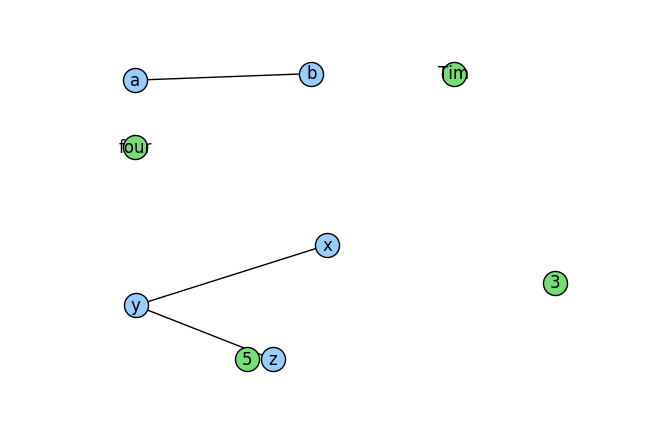

In [8]:
# we need this 'magic' command to draw graphs inline
%matplotlib inline  

GREEN = "#77DD77"
BLUE = "#99CCFF"

nx.draw(g, node_color=GREEN, with_labels=True)
nx.draw(h, node_color=BLUE, with_labels=True)

# TODO: nothing to write, just run this :)

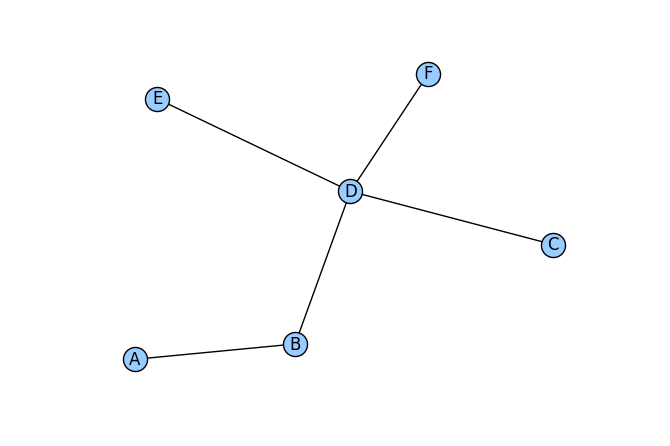

In [9]:
g = nx.Graph()

# TODO: create the graph illustrated above
g.add_edges_from([('B','A'), ('D','C'), ('D','E'), ('D','F'), ('D', 'B')])

nx.draw(g, node_color=BLUE, with_labels=True)

directed edges: [(1, 2), (2, 3)]


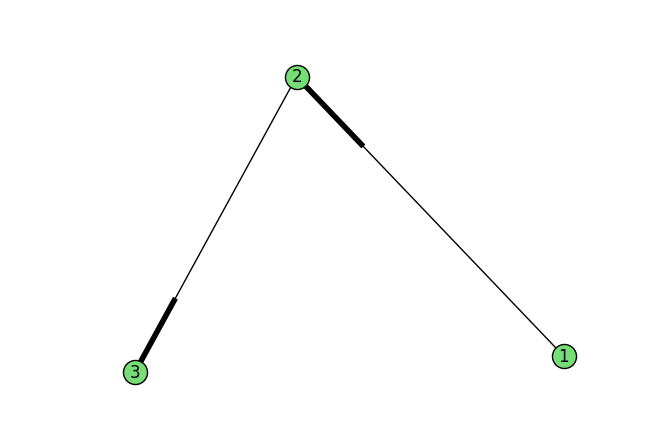

In [10]:
#Directed Graphs
'''Lesson: use nx.DiGraph() to create a new directed graph
'''

# TODO: create a directed graph
dg = nx.DiGraph()


dg.add_edges_from([(1,2), (2,3)])

# TODO: run this cell, you should see 2 directed edges

print ('directed edges:', dg.edges())
nx.draw(dg, node_color=GREEN, with_labels=True)

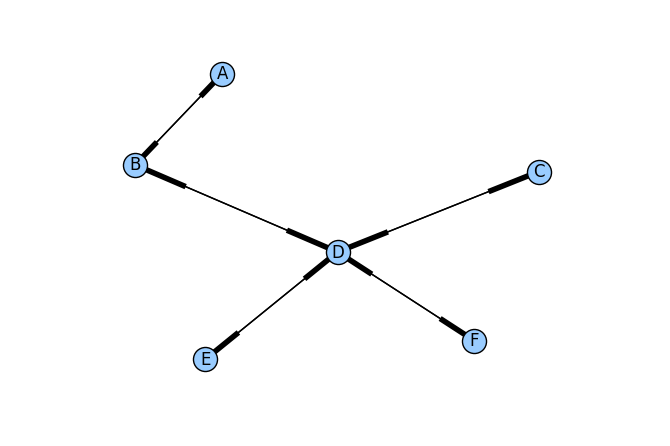

In [11]:
'''We can make directed graphs from existing graphs, eg:
        nx.DiGraph(g)
'''

# TODO: create a directed graph from g
dg = nx.DiGraph(g)


nx.draw(dg, node_color=BLUE, with_labels=True)

In [12]:
''' Notice that nodes A and B have TWO directed edges:
        A -> B
        B -> A
'''

# TODO: run dg.edges() to confirm that each node pair has TWO directed edges
dg.edges()

[('B', 'A'),
 ('B', 'D'),
 ('F', 'D'),
 ('D', 'B'),
 ('D', 'C'),
 ('D', 'F'),
 ('D', 'E'),
 ('C', 'D'),
 ('E', 'D'),
 ('A', 'B')]

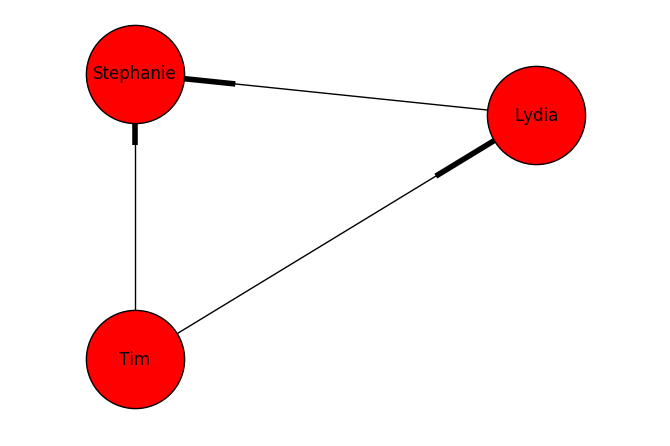

In [13]:
G= nx.DiGraph()
G.add_node('Tim')
G.add_nodes_from(['Lydia','Stephanie'])
G.add_edge('Tim', 'Lydia')
G.add_edges_from([('Tim','Stephanie'),('Lydia','Stephanie')])
nx.draw_spectral(G, with_labels=True, node_size=5000)
plt.show()

In [14]:
G.add_node(np.mean)
print(G.nodes())

['Lydia', <function mean at 0x106f4be18>, 'Tim', 'Stephanie']


In [15]:
D =  nx.read_weighted_edgelist('test.txt',create_using=nx.DiGraph())
len(D.nodes()),len(D.edges())

(4039, 88234)

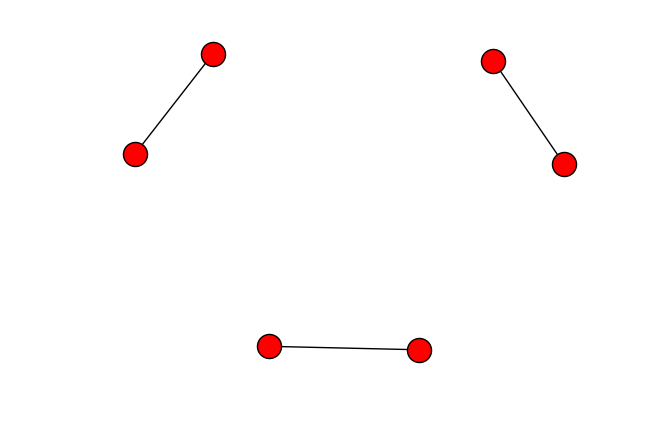

In [16]:
cities = nx.Graph()

cities.add_edge('San Diego', 'Los Angeles', { 'distance': 0.4})
cities.add_edge('New York', 'Nashville', { 'distance': 5.6})
cities.add_edge('Boston', 'D.C.', { 'distance': 0.8})

nx.draw(cities)


In [17]:
# Degree Distribution for all nodes
print ('Degree Distribution:', g.degree())

Degree Distribution: {'B': 2, 'F': 1, 'D': 4, 'C': 1, 'E': 1, 'A': 1}


In [18]:
# Generate the graph above
paths = nx.Graph()
paths.add_edges_from([
    ('A','B'), ('B','D'), ('B','C'), ('D','E'), ('D','C'),
    ('C','1'), ('1','2'), ('1','3'), ('2','3'), 
    ('E','2'), ('E','4')])

# Display average shortest path details
print ('Avg shortest path from A to E is', nx.shortest_path_length(paths, 'A','E'), 'hops:')
print (nx.shortest_path(paths, 'A','E'))

Avg shortest path from A to E is 3 hops:
['A', 'B', 'D', 'E']


In [19]:
''' To calculate Degree Distribution for all nodes, use:
    g.degree()  for non-normalized values,
    nx.degree_centrality(g)   for normalized values
'''

# TODO degree distrib., non-normalized
print(g.degree())
# TODO degree distrib., normalized
print(nx.degree_centrality(g))

{'B': 2, 'F': 1, 'D': 4, 'C': 1, 'E': 1, 'A': 1}
{'B': 0.4, 'F': 0.2, 'D': 0.8, 'C': 0.2, 'E': 0.2, 'A': 0.2}


In [20]:
''' To calculate betweenness centrality, use:
    nx.betweenness_centrality(g, normalized=True/False)   default is True
'''

# TODO find betweenness centrality (both normalized and non)
print(nx.betweenness_centrality(g, normalized=True) )
print(nx.betweenness_centrality(g, normalized=False) )

{'B': 0.4, 'F': 0.0, 'D': 0.9, 'C': 0.0, 'E': 0.0, 'A': 0.0}
{'B': 4.0, 'F': 0.0, 'D': 9.0, 'C': 0.0, 'E': 0.0, 'A': 0.0}


In [21]:
''' to calculate closeness centrality, use:
    nx.closeness_centrality(g)
'''

# TODO find closeness centrality
print(nx.closeness_centrality(g))

{'B': 0.625, 'F': 0.5, 'D': 0.8333333333333334, 'C': 0.5, 'E': 0.5, 'A': 0.4166666666666667}
